# Metricas

Cuando creamos distintos modelos de clasificacion (Regresion Logistica, RandomForestClassifier, etc) nos interesa conocer si el modelo esta clasificando correctamente lo que queremos.

Hay distintas metricas que miden cosas distintas que pueden ayudarnos en algunos casos pero en otros pueden confundirnos, por ende _es muy importante tener bien claro que es lo que estamos midiendo_.

* $Precison = \frac{TP}{TP + FP}$

* $Recall =\frac{TP}{TP + FN}$

* $TPR$ sinonimo de $Recall$ - (True Positive Rate)

* $FPR = \frac{FP}{FP + TN}$ - (False Positive Rate)

* ROC: (Receiver Operating Characteristic)
* AUC:  Area Under (ROC) Curve

$TP$: Cantidad de clasificaciones positivas correctas

$TN$: Cantidad de clasificaciones negativas correctas

$FN$: Cantidad de clasificaciones negativas incorrectas

$FP$: Cantidad de clasificaciones positivas incorrectas


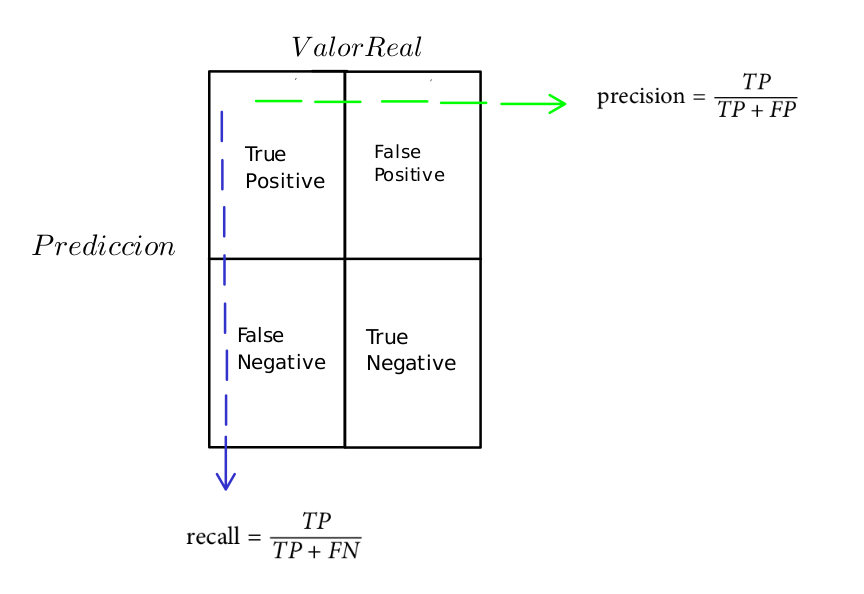


**Presicion**: ¿Cuál es la proporcion de casos predichos acertados? 

Es decir sobre el total de casos predecidos por el modelo, cuantos fueron TP (acerto correctamente la clasificacion)?

**Recall = TPR**: ¿Cuál es la proporcion de casos acertados sobre el total de casos? o ¿Cuál es la proporcion de casos positivos que clasifique como positivos?

Es decir sobre el total de casos predecidos por el modelo, cuantos fueron TP (acerto correctamente la clasificacion)?

**FPR** ¿Cuál es la proporcion de casos negativos que clasifique como positivos?

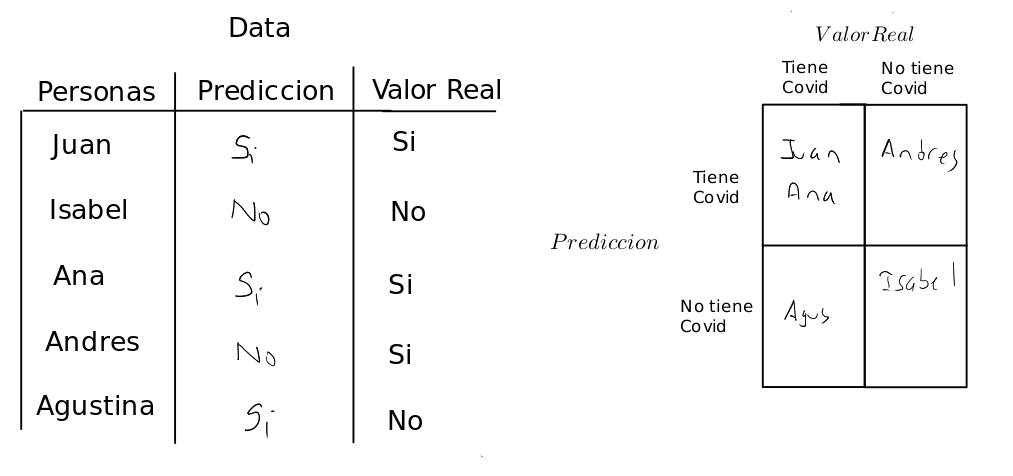

En este caso 

$presicion = \frac{TP}{TP + FP} = \frac{2}{2 + 1} = 2/3 = 0.66667$

$Recall = TPR = \frac{TP}{TP + FN} = \frac{2}{2 + 1} = 2/3 = 0.66667$

$FPR = \frac{FP}{FP + TN} = \frac{1}{1 + 1} = 1/2 = 0.5$

## ROC (Receiver Operating Characteristic)

La tabla de confusion no tiene porque ser fija. Si modificamos el modelo (le cambiamos hiperparametros, que se veran mas adelante) puede llegar a obtenerse predicciones diferentes, haciendo que cambie su tabla de confusion.

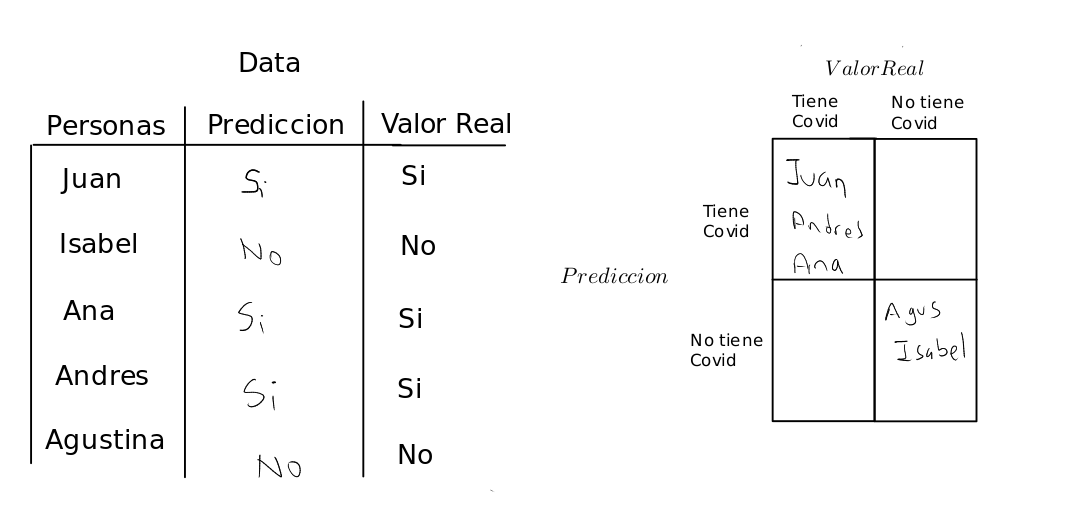

En este caso 

$presicion = \frac{TP}{TP + FP} = \frac{3}{3 + 0} = 3/3 = 1$

$Recall = TPR = \frac{TP}{TP + FN} = \frac{3}{3 + 0} = 3/3 = 1 $

$FPR = \frac{FP}{FP + TN} = \frac{0}{0 + 3} = 0/3 = 0$


Al hacer esto muchas veces para distintas configuraciones y graficando la proporcion entre $\frac{TPR}{FPR}$ o la proporcion $\frac{recall}{precision}$ (son ligeramente diferentes) para cada tabla de confusion, nos quedamos con una curva ROC.

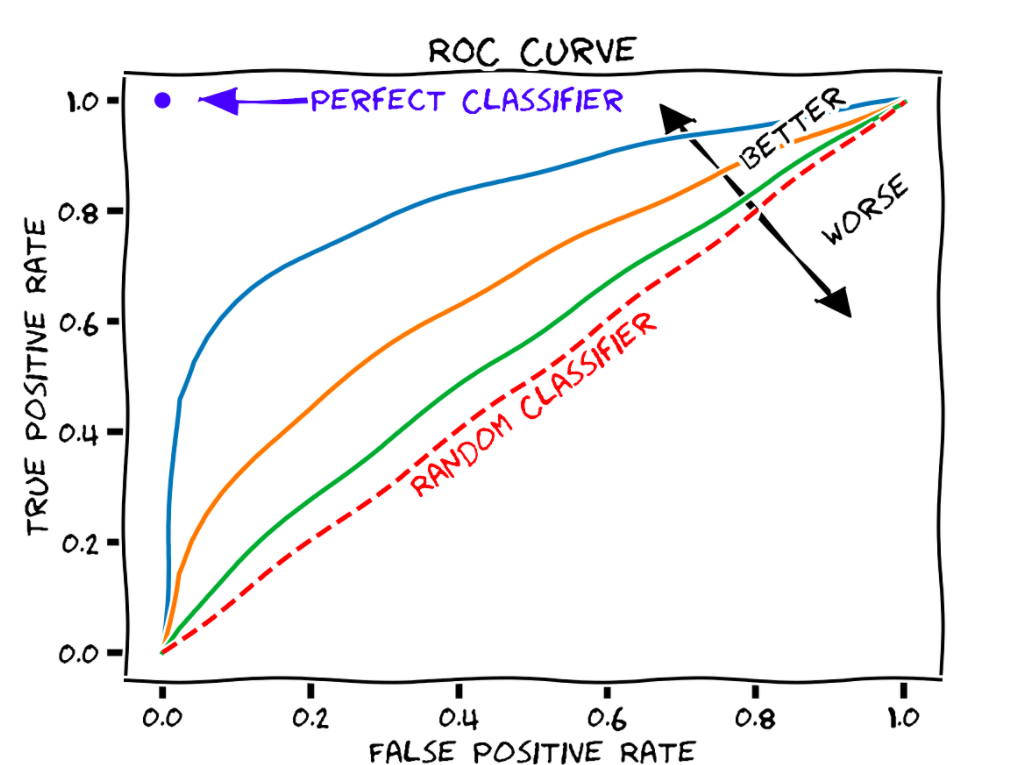

Observar que punto a punto va cambiando TPR y FPR y lo que nos interesa es la **proporcion**

En el grafico anterior las 3 curvas representan 3 modelos diferentes.

# Ejemplo de clasificacion binaria y metricas ROC

In [1]:
# https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_roc_curve_visualization_api.html

import matplotlib.pyplot as plt

# Modelos que vamos a utilizar
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import RocCurveDisplay

# Dataset Wine https://scikit-learn.org/stable/datasets/toy_dataset.html#wine-dataset
from sklearn.datasets import load_wine

# Metodo interno que separa test set y train set
from sklearn.model_selection import train_test_split

X, y = load_wine(return_X_y=True)

The data is the results of a chemical analysis of wines grown in the same region in Italy by three different cultivators. There are thirteen different measurements taken for different constituents found in the three types of wine.

In [2]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

Estamos interesados en crear un clasificador binario que responda: es este vino del tipo 2?

Me quedo unicamente con el vino 'tipo 2'

In [3]:
y = (y == 2)
y

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [4]:
# Entreno el modelo SVC

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
svc = SVC(random_state=42)
svc.fit(X_train, y_train)

SVC(random_state=42)

Curva ROC para el modelo SVC

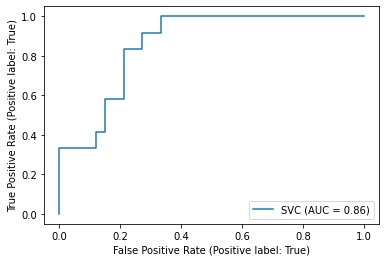

In [5]:
svc_disp = RocCurveDisplay.from_estimator(svc, X_test, y_test)
plt.show()

Curva ROC para el modelo RandomForestClassifier vs SVC

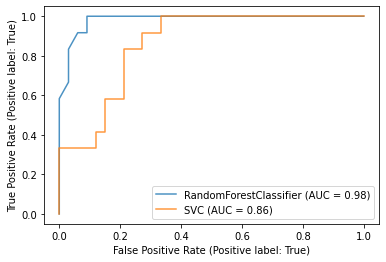

In [6]:
# Entreno el RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10, random_state=42)
rfc.fit(X_train, y_train)

ax = plt.gca()
rfc_disp = RocCurveDisplay.from_estimator(rfc, X_test, y_test, ax=ax, alpha=0.8)
svc_disp.plot(ax=ax, alpha=0.8)
plt.show()

## Curva AUC

Por ultimo una metrica bastante util es calcular el area debajo de la curva ROC recien determinada.

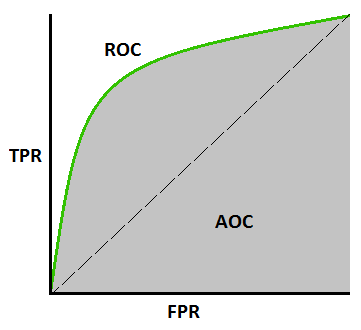

# Ejemplo de clasificacion binaria y metricas AUC

In [7]:
# Dataset que vamos a probar https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer
from sklearn.datasets import load_breast_cancer

# Modelo que vamos a probar
from sklearn.linear_model import LogisticRegression

# Metrica AUC de la libreria sklearn
from sklearn.metrics import roc_auc_score

X, y = load_breast_cancer(return_X_y=True)
clf = LogisticRegression(solver="liblinear", random_state=0).fit(X, y)
roc_auc_score(y, clf.predict_proba(X)[:, 1])

0.994767718408118

# Bibliografia consultada

Capitulo 3 - Hands On Machine Learning with Scikit Learn Keras and Tensorflow - Aurélien Géron

[Video Excelente ROC & AUC](https://www.youtube.com/watch?v=xugjARegisk)

[ROC & AUC metrics - Blog](https://towardsdatascience.com/understanding-the-roc-and-auc-curves-a05b68550b69)

[Curso de Google - True Positive, True Negative, False Positive, False Negative](https://developers.google.com/machine-learning/crash-course/classification/true-false-positive-negative)

[Curso de Google - Presicion & Recall](https://developers.google.com/machine-learning/crash-course/classification/precision-and-recall)